In [1]:
%matplotlib inline

In [2]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
from galsize_models.models.universal_alpha import component_size_vs_rhalo
from halotools.empirical_models import Moster13SmHm
from astropy.cosmology import Planck15

def halo_mass_from_stellar_mass(mstar_planck15, cosmology=Planck15, **kwargs):
    mstar_unity_h = mstar_planck15*cosmology.h*cosmology.h
    smhm_model = Moster13SmHm()
    for key in kwargs.keys():
        if key in list(smhm_model.param_dict.keys()):
            smhm_model.param_dict[key] = kwargs[key]
    logmhalo_unity_h_abscissa = np.linspace(10, 15, 1000)
    sm_unity_h_abscissa = smhm_model.mean_stellar_mass(prim_haloprop=10**logmhalo_unity_h_abscissa)
    result_unity_h = 10**np.interp(np.log10(mstar_planck15), 
                     np.log10(sm_unity_h_abscissa), logmhalo_unity_h_abscissa)
    result_planck15 = result_unity_h/cosmology.h
    return result_planck15

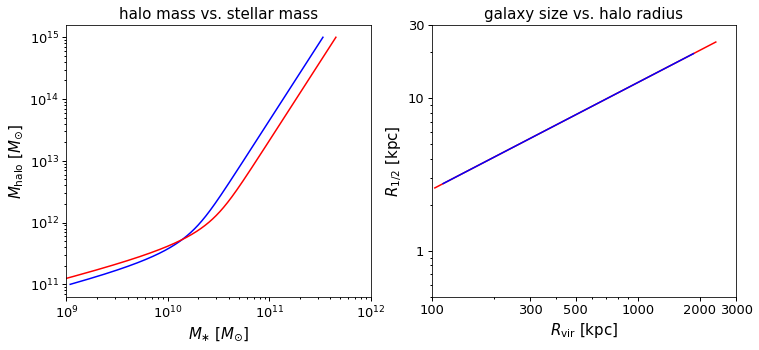

In [3]:

sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
m10_model1 = 11.59
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)

norm_model2, alpha_model2 = 0.1, 0.7
m10_model2 = 11.8
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, m10=m10_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

__=ax2.loglog()
__=ax1.loglog()

__=ax2.plot(rhalo_model1, rhalf_model1, color='red')
__=ax2.plot(rhalo_model2, rhalf_model2, color='blue')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['m10'] = m10_model1
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue')

smhm_model.param_dict['m10'] = m10_model2
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red')

xlim1 = ax2.set_xlim(100, 3000)
ylim1 = ax2.set_ylim(0.5, 30)
__=ax2.set_xticks((100, 300, 500, 1000, 2000, 3000))
__=ax2.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel1 = ax2.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel1 = ax2.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax2.set_title('galaxy size vs. halo radius')

xlim2 = ax1.set_xlim(1e9, 1e12)
xlabel2 = ax1.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel2 = ax1.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title2 = ax1.set_title('halo mass vs. stellar mass')


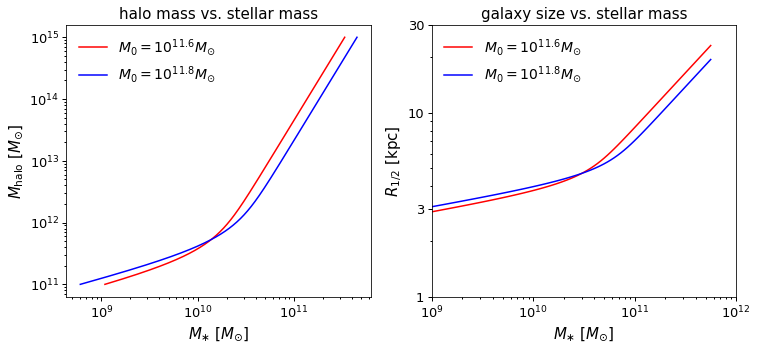

In [4]:
sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
m10_model1 = 11.59
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)

norm_model2, alpha_model2 = 0.1, 0.7
m10_model2 = 11.8
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, m10=m10_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

__=ax1.loglog()
__=ax2.loglog()

__=ax2.plot(sm_abscissa, rhalf_model1, color='red', label=r'$M_{0} = 10^{11.6}M_{\odot}$')
__=ax2.plot(sm_abscissa, rhalf_model2, color='blue', label=r'$M_{0} = 10^{11.8}M_{\odot}$')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['m10'] = m10_model1
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$M_{0} = 10^{11.6}M_{\odot}$')

smhm_model.param_dict['m10'] = m10_model2
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$M_{0} = 10^{11.8}M_{\odot}$')

xlim2 = ax2.set_xlim(1e9, 1e12)
ylim2 = ax2.set_ylim(1, 30)
__=ax2.set_yticks((1, 3 ,10, 30))
from matplotlib import ticker
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel1 = ax1.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel1 = ax1.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title1 = ax1.set_title('halo mass vs. stellar mass')

xlabel2 = ax2.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel2 = ax2.set_ylabel(r'$R_{1/2}$ [kpc]')
title2 = ax2.set_title('galaxy size vs. stellar mass')
legend1 = ax1.legend(fontsize=14); legend2 = ax2.legend(fontsize=14)

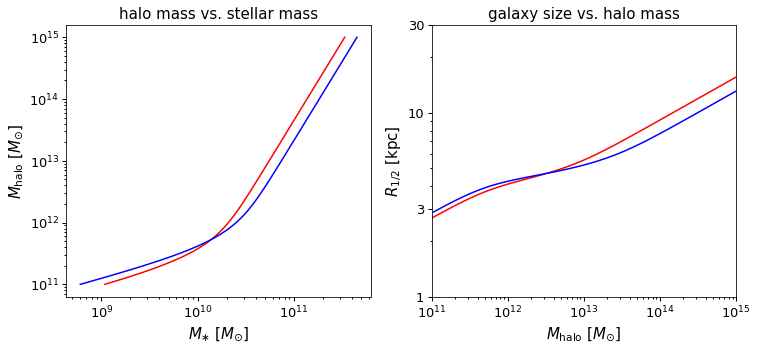

In [5]:
sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
m10_model1 = 11.59
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)
mhalo_model1 = halo_mass_from_stellar_mass(sm_abscissa, m0=m10_model1)

norm_model2, alpha_model2 = 0.1, 0.7
m10_model2 = 11.8
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, m10=m10_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)
mhalo_model2 = halo_mass_from_stellar_mass(sm_abscissa, m0=m10_model2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

__=ax1.loglog()
__=ax2.loglog()

__=ax2.plot(mhalo_model1, rhalf_model1, color='red')
__=ax2.plot(mhalo_model2, rhalf_model2, color='blue')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['m10'] = m10_model1
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red')

smhm_model.param_dict['m10'] = m10_model2
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue')

xlim2 = ax2.set_xlim(1e11, 1e15)
ylim2 = ax2.set_ylim(1, 30)
__=ax2.set_yticks((1, 3, 10, 30))
from matplotlib import ticker
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel1 = ax1.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel1 = ax1.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title1 = ax1.set_title('halo mass vs. stellar mass')

xlabel2 = ax2.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel2 = ax2.set_ylabel(r'$R_{1/2}$ [kpc]')
title2 = ax2.set_title('galaxy size vs. halo mass')


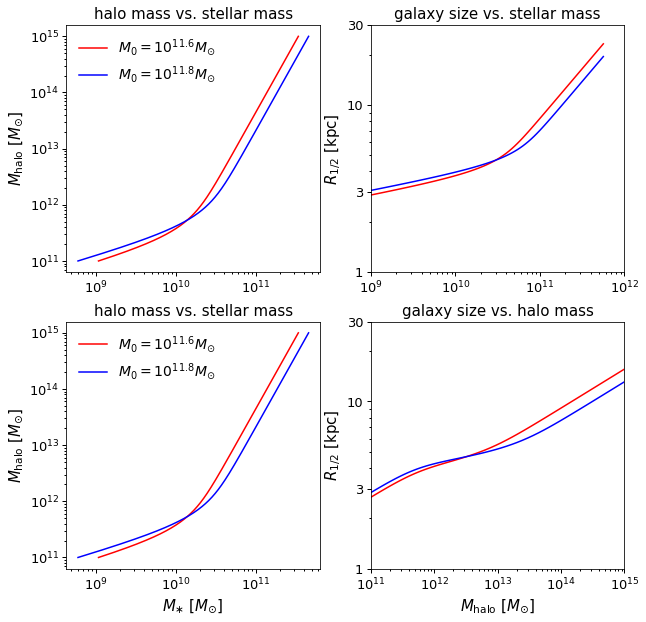

In [7]:
sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
m10_model1 = 11.59
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)
mhalo_model1 = halo_mass_from_stellar_mass(sm_abscissa, m0=m10_model1)

norm_model2, alpha_model2 = 0.1, 0.7
m10_model2 = 11.8
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, m10=m10_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)
mhalo_model2 = halo_mass_from_stellar_mass(sm_abscissa, m0=m10_model2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
((ax11, ax12), (ax21, ax22)) = axes
__=ax11.loglog(); __=ax12.loglog()
__=ax21.loglog(); __=ax22.loglog()



__=ax12.plot(sm_abscissa, rhalf_model1, color='red', label=r'$M_{0} = 10^{11.6}M_{\odot}$')
__=ax12.plot(sm_abscissa, rhalf_model2, color='blue', label=r'$M_{0} = 10^{11.8}M_{\odot}$')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['m10'] = m10_model1
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$M_{0} = 10^{11.6}M_{\odot}$')
smhm_model.param_dict['m10'] = m10_model2
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$M_{0} = 10^{11.8}M_{\odot}$')
smhm_model.param_dict['m10'] = m10_model1
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$M_{0} = 10^{11.6}M_{\odot}$')
smhm_model.param_dict['m10'] = m10_model2
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$M_{0} = 10^{11.8}M_{\odot}$')

__=ax22.plot(mhalo_model1, rhalf_model1, color='red')
__=ax22.plot(mhalo_model2, rhalf_model2, color='blue')


xlim12 = ax12.set_xlim(1e9, 1e12)
ylim12 = ax12.set_ylim(1, 30)
ylim22 = ax22.set_ylim(1, 30)
__=ax12.set_yticks((1, 3 ,10, 30))
__=ax22.set_yticks((1, 3 ,10, 30))
from matplotlib import ticker
__=ax12.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax12.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax22.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax22.get_yaxis().set_minor_formatter(ticker.NullFormatter())

legend11 = ax11.legend(fontsize=14)
legend21 = ax21.legend(fontsize=14)

xlim22 = ax22.set_xlim(1e11, 1e15)

xlabel12 = ax21.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
xlabel22 = ax22.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')

ylabel11 = ax11.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel21 = ax21.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title11 = ax11.set_title('halo mass vs. stellar mass')
title12 = ax12.set_title('galaxy size vs. stellar mass')
title21 = ax21.set_title('halo mass vs. stellar mass')
title22 = ax22.set_title('galaxy size vs. halo mass')


ylabel12 = ax12.set_ylabel(r'$R_{1/2}$ [kpc]')
ylabel22 = ax22.set_ylabel(r'$R_{1/2}$ [kpc]')

fig.savefig('smhm_m0_impact_size_scaling.pdf', 
            bbox_extra_artists=[xlabel22, ylabel11], bbox_inches='tight')

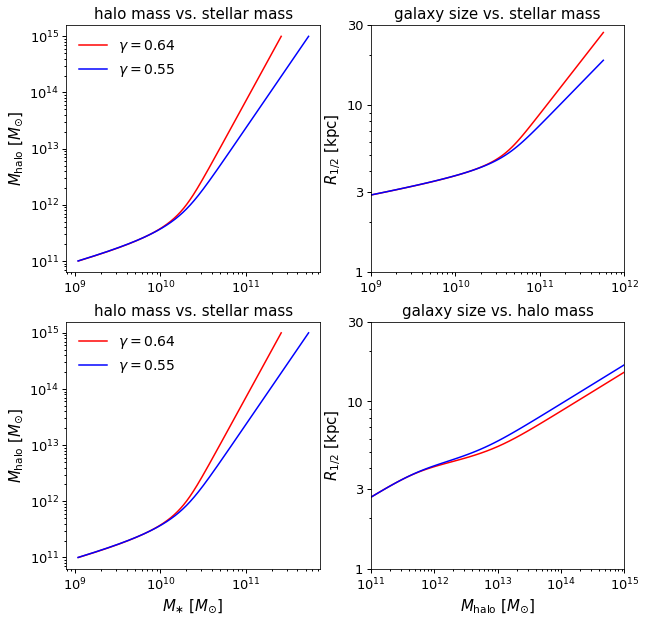

In [12]:
sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
gamma_model1 = 0.64
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa, gamma10=gamma_model1)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)
mhalo_model1 = halo_mass_from_stellar_mass(sm_abscissa, gamma10=gamma_model1)

norm_model2, alpha_model2 = 0.1, 0.7
gamma_model2 = 0.55
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, gamma10=gamma_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)
mhalo_model2 = halo_mass_from_stellar_mass(sm_abscissa, gamma10=gamma_model2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
((ax11, ax12), (ax21, ax22)) = axes
__=ax11.loglog(); __=ax12.loglog()
__=ax21.loglog(); __=ax22.loglog()



__=ax12.plot(sm_abscissa, rhalf_model1, color='red', label=r'$\gamma = 0.64$')
__=ax12.plot(sm_abscissa, rhalf_model2, color='blue', label=r'$\gamma = 0.55$')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['gamma10'] = gamma_model1
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$\gamma = 0.64$')
smhm_model.param_dict['gamma10'] = gamma_model2
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$\gamma = 0.55$')
smhm_model.param_dict['gamma10'] = gamma_model1
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$\gamma = 0.64$')
smhm_model.param_dict['gamma10'] = gamma_model2
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$\gamma = 0.55$')

__=ax22.plot(mhalo_model1, rhalf_model1, color='red')
__=ax22.plot(mhalo_model2, rhalf_model2, color='blue')


xlim12 = ax12.set_xlim(1e9, 1e12)
ylim12 = ax12.set_ylim(1, 30)
ylim22 = ax22.set_ylim(1, 30)
__=ax12.set_yticks((1, 3 ,10, 30))
__=ax22.set_yticks((1, 3 ,10, 30))
from matplotlib import ticker
__=ax12.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax12.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax22.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax22.get_yaxis().set_minor_formatter(ticker.NullFormatter())

legend11 = ax11.legend(fontsize=14)
legend21 = ax21.legend(fontsize=14)

xlim22 = ax22.set_xlim(1e11, 1e15)

xlabel12 = ax21.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
xlabel22 = ax22.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')

ylabel11 = ax11.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel21 = ax21.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title11 = ax11.set_title('halo mass vs. stellar mass')
title12 = ax12.set_title('galaxy size vs. stellar mass')
title21 = ax21.set_title('halo mass vs. stellar mass')
title22 = ax22.set_title('galaxy size vs. halo mass')


ylabel12 = ax12.set_ylabel(r'$R_{1/2}$ [kpc]')
ylabel22 = ax22.set_ylabel(r'$R_{1/2}$ [kpc]')

fig.savefig('smhm_gamma_impact_size_scaling.pdf', 
            bbox_extra_artists=[xlabel22, ylabel11], bbox_inches='tight')

In [13]:
print(smhm_model.param_dict)

{u'm11': 1.195, u'm10': 11.59, u'n10': 0.0351, u'n11': -0.0247, u'gamma11': 0.329, u'gamma10': 0.55, u'scatter_model_param1': 0.2, u'beta11': -0.826, u'beta10': 1.376}


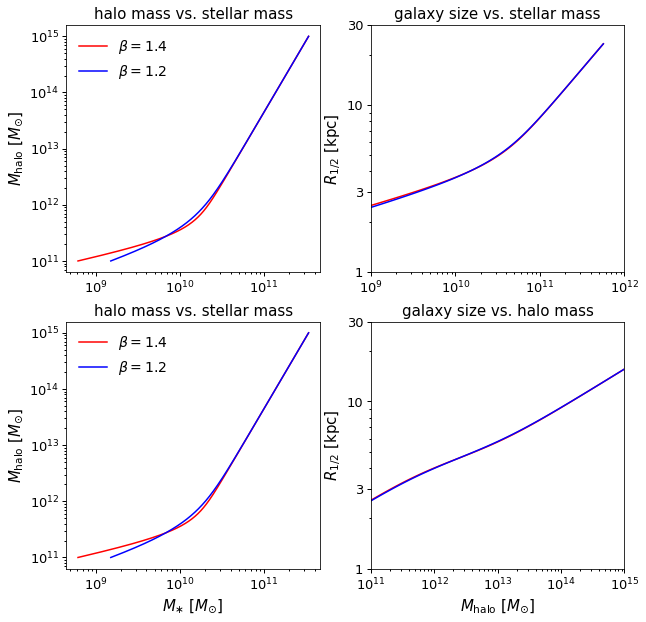

In [15]:
sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
beta_model1 = 2
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa, beta10=gamma_model1)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)
mhalo_model1 = halo_mass_from_stellar_mass(sm_abscissa, beta10=gamma_model1)

norm_model2, alpha_model2 = 0.1, 0.7
beta_model2 = 1.
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, beta10=gamma_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)
mhalo_model2 = halo_mass_from_stellar_mass(sm_abscissa, beta10=gamma_model2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
((ax11, ax12), (ax21, ax22)) = axes
__=ax11.loglog(); __=ax12.loglog()
__=ax21.loglog(); __=ax22.loglog()



__=ax12.plot(sm_abscissa, rhalf_model1, color='red', label=r'$\beta = 1.4$')
__=ax12.plot(sm_abscissa, rhalf_model2, color='blue', label=r'$\beta = 1.2$')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['beta10'] = beta_model1
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$\beta = 1.4$')
smhm_model.param_dict['beta10'] = beta_model2
__=ax11.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$\beta = 1.2$')
smhm_model.param_dict['beta10'] = beta_model1
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red', label=r'$\beta = 1.4$')
smhm_model.param_dict['beta10'] = beta_model2
__=ax21.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue', label=r'$\beta = 1.2$')

__=ax22.plot(mhalo_model1, rhalf_model1, color='red')
__=ax22.plot(mhalo_model2, rhalf_model2, color='blue')


xlim12 = ax12.set_xlim(1e9, 1e12)
ylim12 = ax12.set_ylim(1, 30)
ylim22 = ax22.set_ylim(1, 30)
__=ax12.set_yticks((1, 3 ,10, 30))
__=ax22.set_yticks((1, 3 ,10, 30))
from matplotlib import ticker
__=ax12.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax12.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax22.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax22.get_yaxis().set_minor_formatter(ticker.NullFormatter())

legend11 = ax11.legend(fontsize=14)
legend21 = ax21.legend(fontsize=14)

xlim22 = ax22.set_xlim(1e11, 1e15)

xlabel12 = ax21.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
xlabel22 = ax22.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')

ylabel11 = ax11.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel21 = ax21.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title11 = ax11.set_title('halo mass vs. stellar mass')
title12 = ax12.set_title('galaxy size vs. stellar mass')
title21 = ax21.set_title('halo mass vs. stellar mass')
title22 = ax22.set_title('galaxy size vs. halo mass')


ylabel12 = ax12.set_ylabel(r'$R_{1/2}$ [kpc]')
ylabel22 = ax22.set_ylabel(r'$R_{1/2}$ [kpc]')

fig.savefig('smhm_beta_impact_size_scaling.pdf', 
            bbox_extra_artists=[xlabel22, ylabel11], bbox_inches='tight')